In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/1.csv')
data1=pd.read_csv('/content/3.csv')
data2=pd.read_csv('/content/seasonal.csv')

In [ ]:
data['Page']=pd.to_datetime(data['Page'])
data1['Page']=pd.to_datetime(data1['Page'])
data2['Page']=pd.to_datetime(data2['Page'])

In [ ]:
data=data.set_index('Page')
data1=data1.set_index('Page')
data2=data2.set_index('Page')

In [ ]:
data=data.asfreq('D')

In [ ]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(data['Main_Page_en.wikipedia.org_mobile-web_all-agents'], autolag='AIC')

In [ ]:
test

(-0.4331274594632246,
 0.9044190199066418,
 17,
 784,
 {'1%': -3.4387184182983686,
  '10%': -2.5687368149338816,
  '5%': -2.865233578638179},
 21684.857730556603)

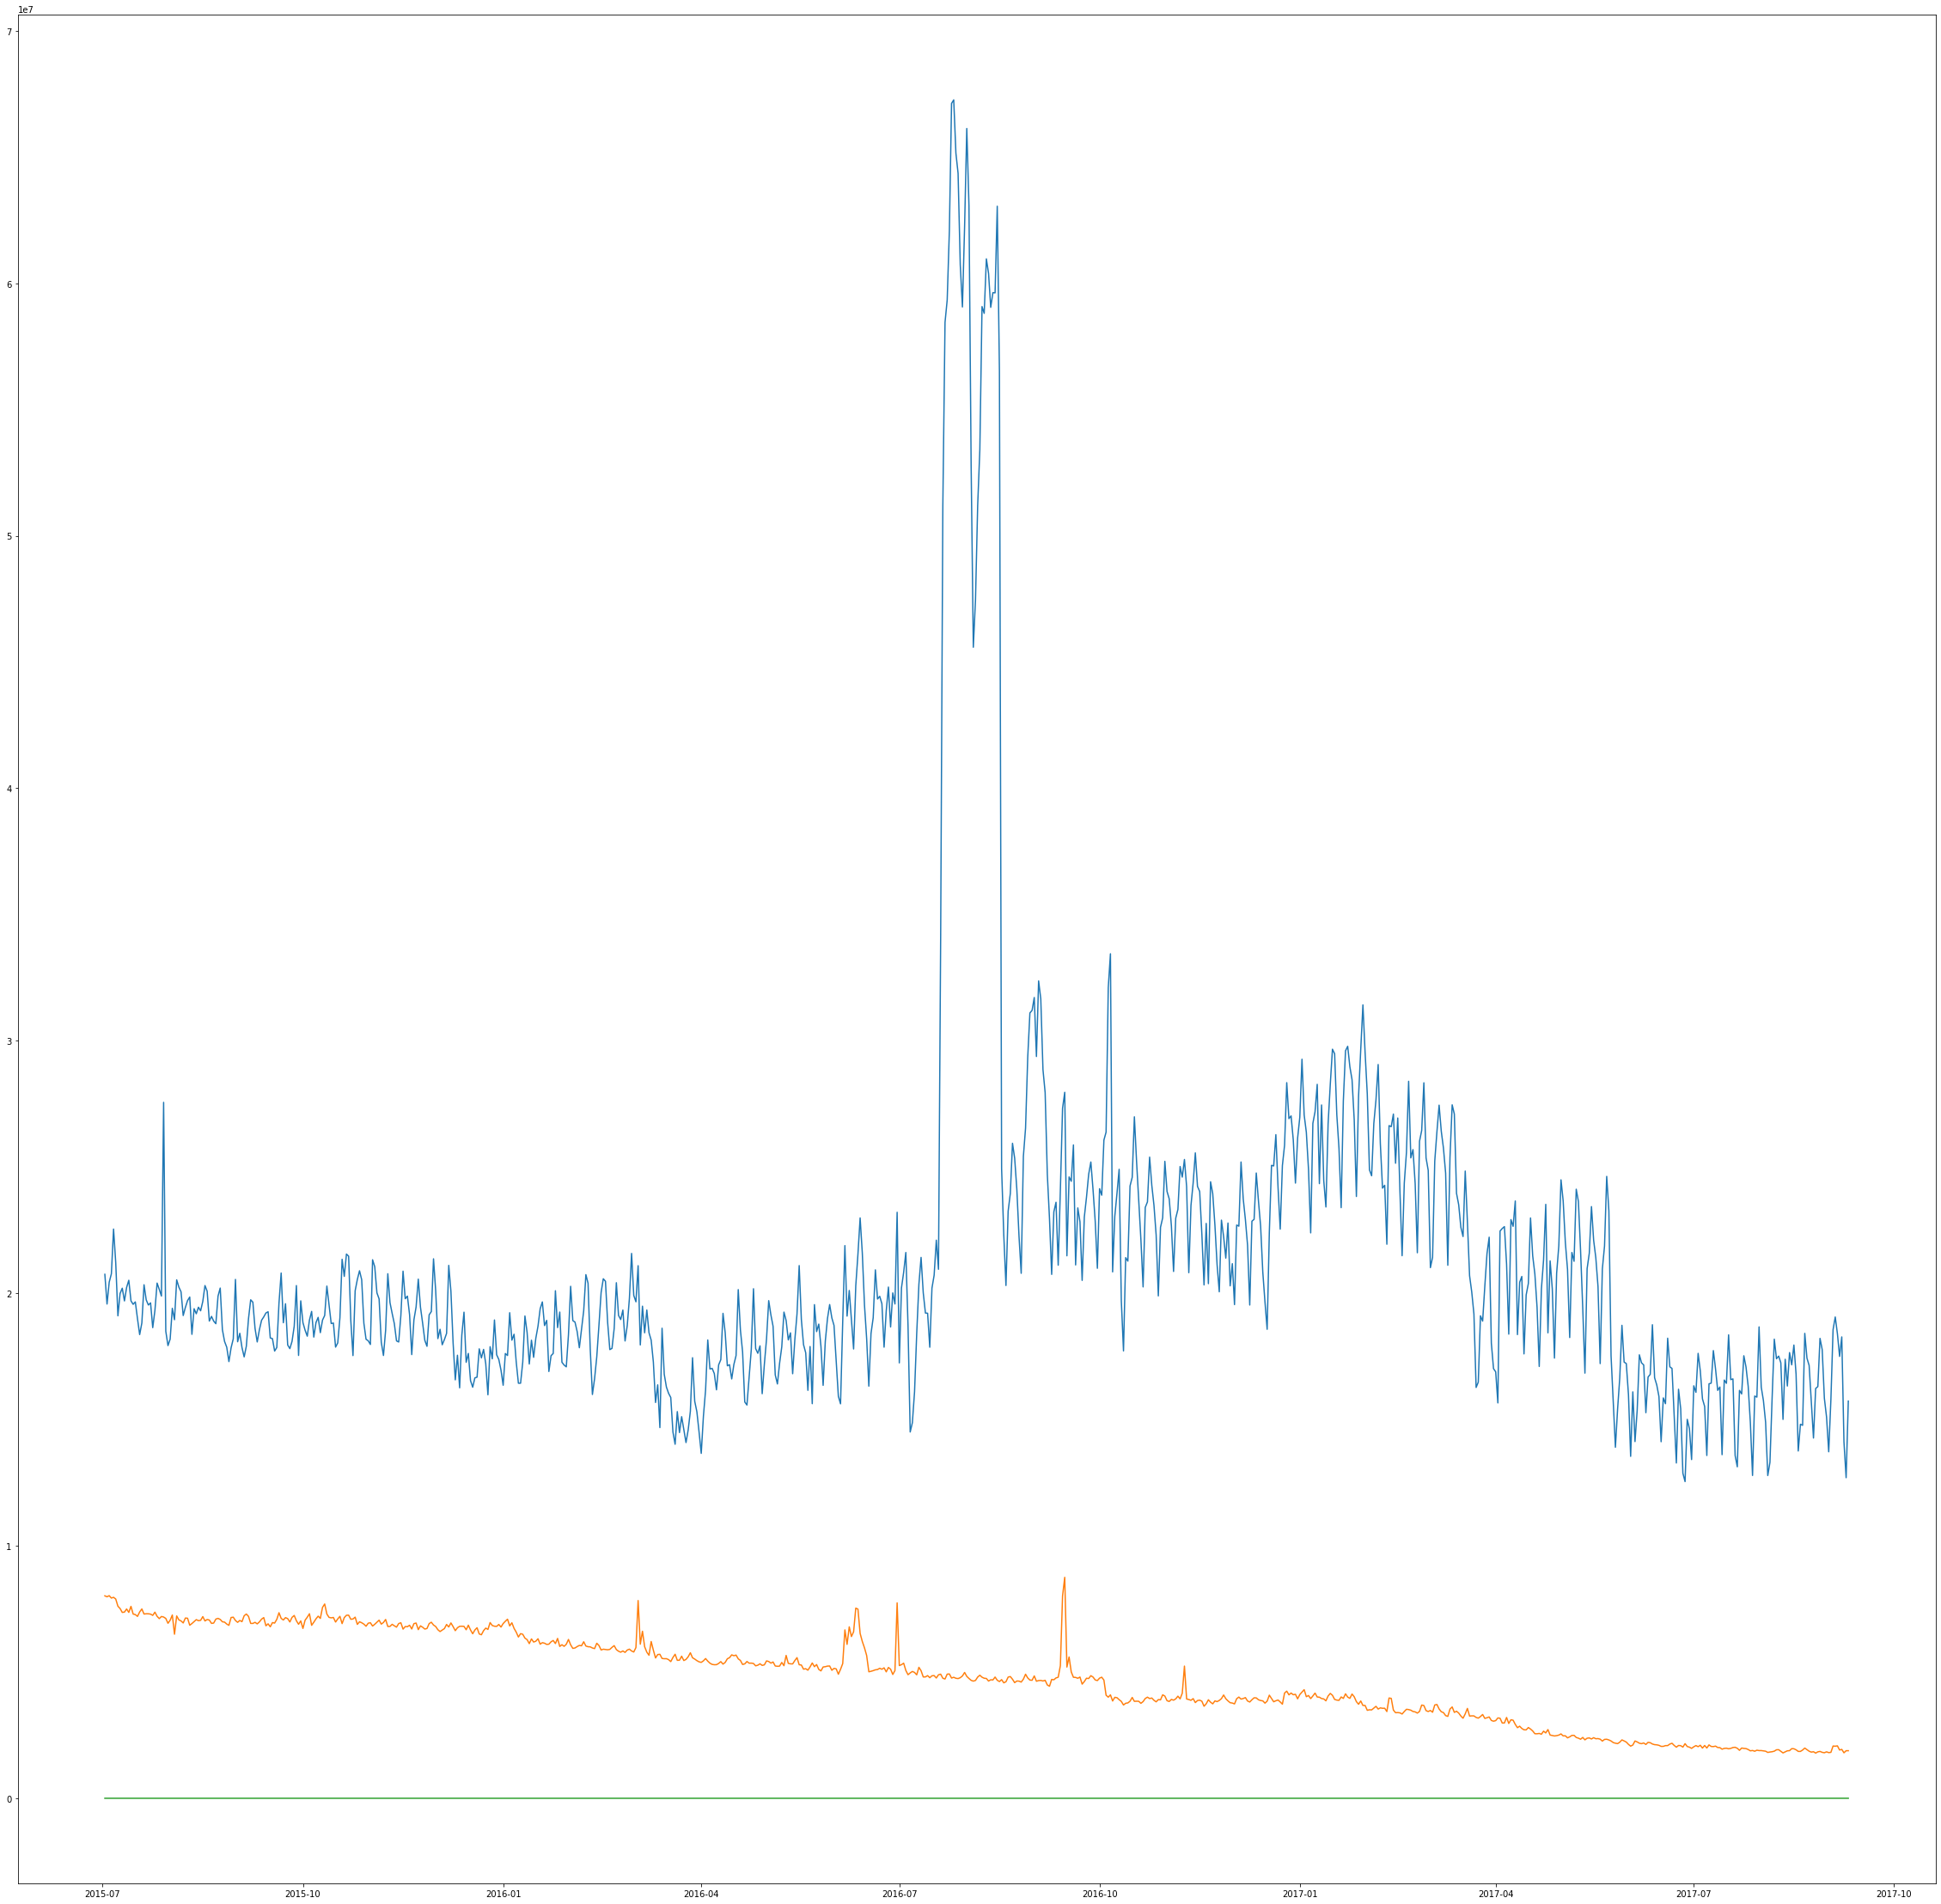

In [ ]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(40)
plt.plot(data)
plt.plot(data1)
plt.plot(data2)
plt.show()

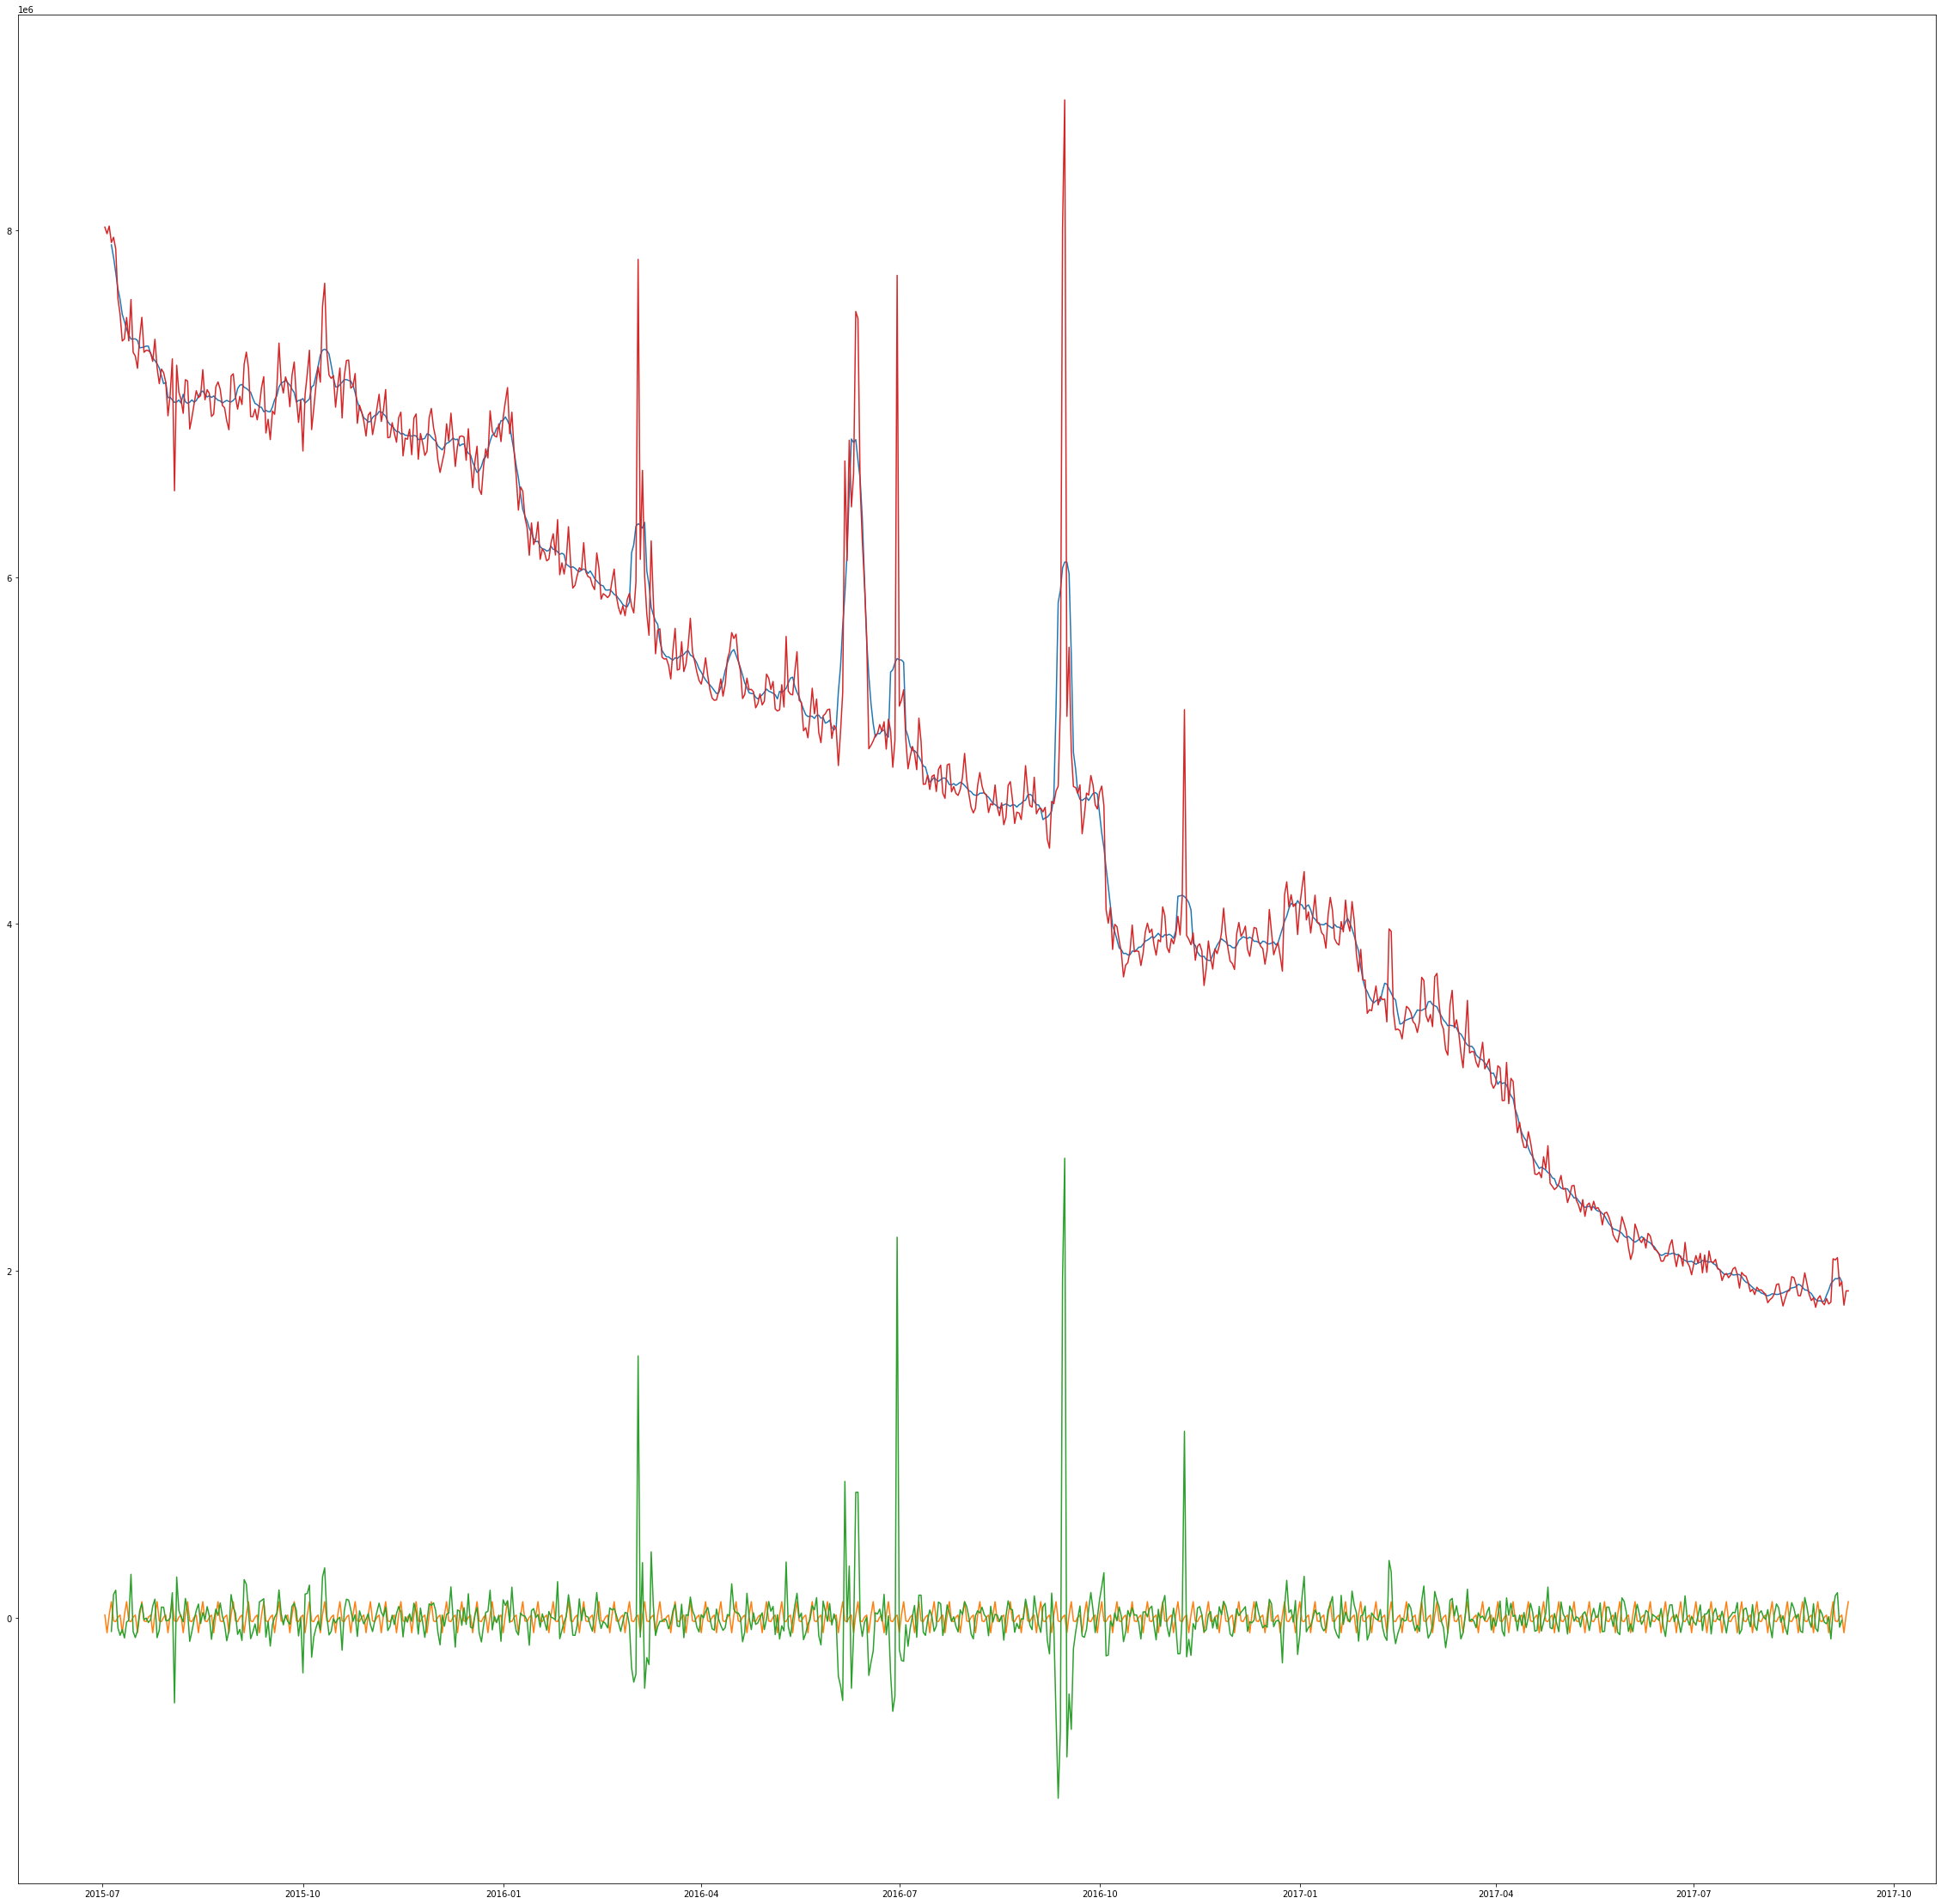

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(40)
plt.plot(result.trend)
plt.plot(result.seasonal)
plt.plot(result.resid)
plt.plot(result.observed)

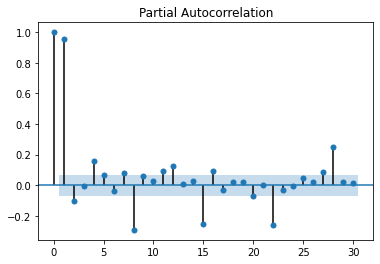

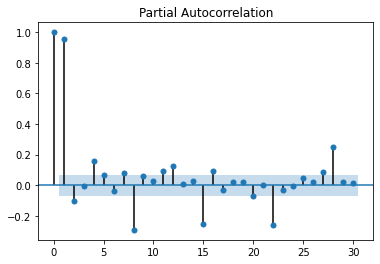

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(data)

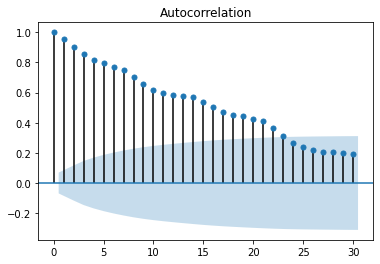

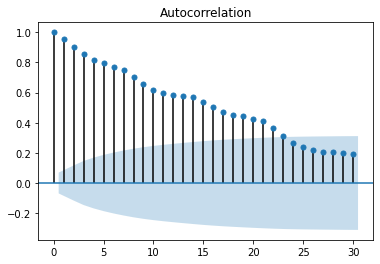

In [ ]:
plot_acf(data)

In [ ]:
test

(-4.491834907454505,
 0.00020342904243446022,
 21,
 780,
 {'1%': -3.4387614757350087,
  '10%': -2.5687469247205788,
  '5%': -2.865252556432172},
 24940.241563389565)

In [ ]:
data_1=data.diff(1).dropna()


In [ ]:
test=adfuller(data_1['Main_Page_en.wikipedia.org_mobile-web_all-agents'], autolag='AIC')
test

(-10.736902401815856,
 2.883529438383815e-19,
 16,
 784,
 {'1%': -3.4387184182983686,
  '10%': -2.5687368149338816,
  '5%': -2.865233578638179},
 21656.09279535505)

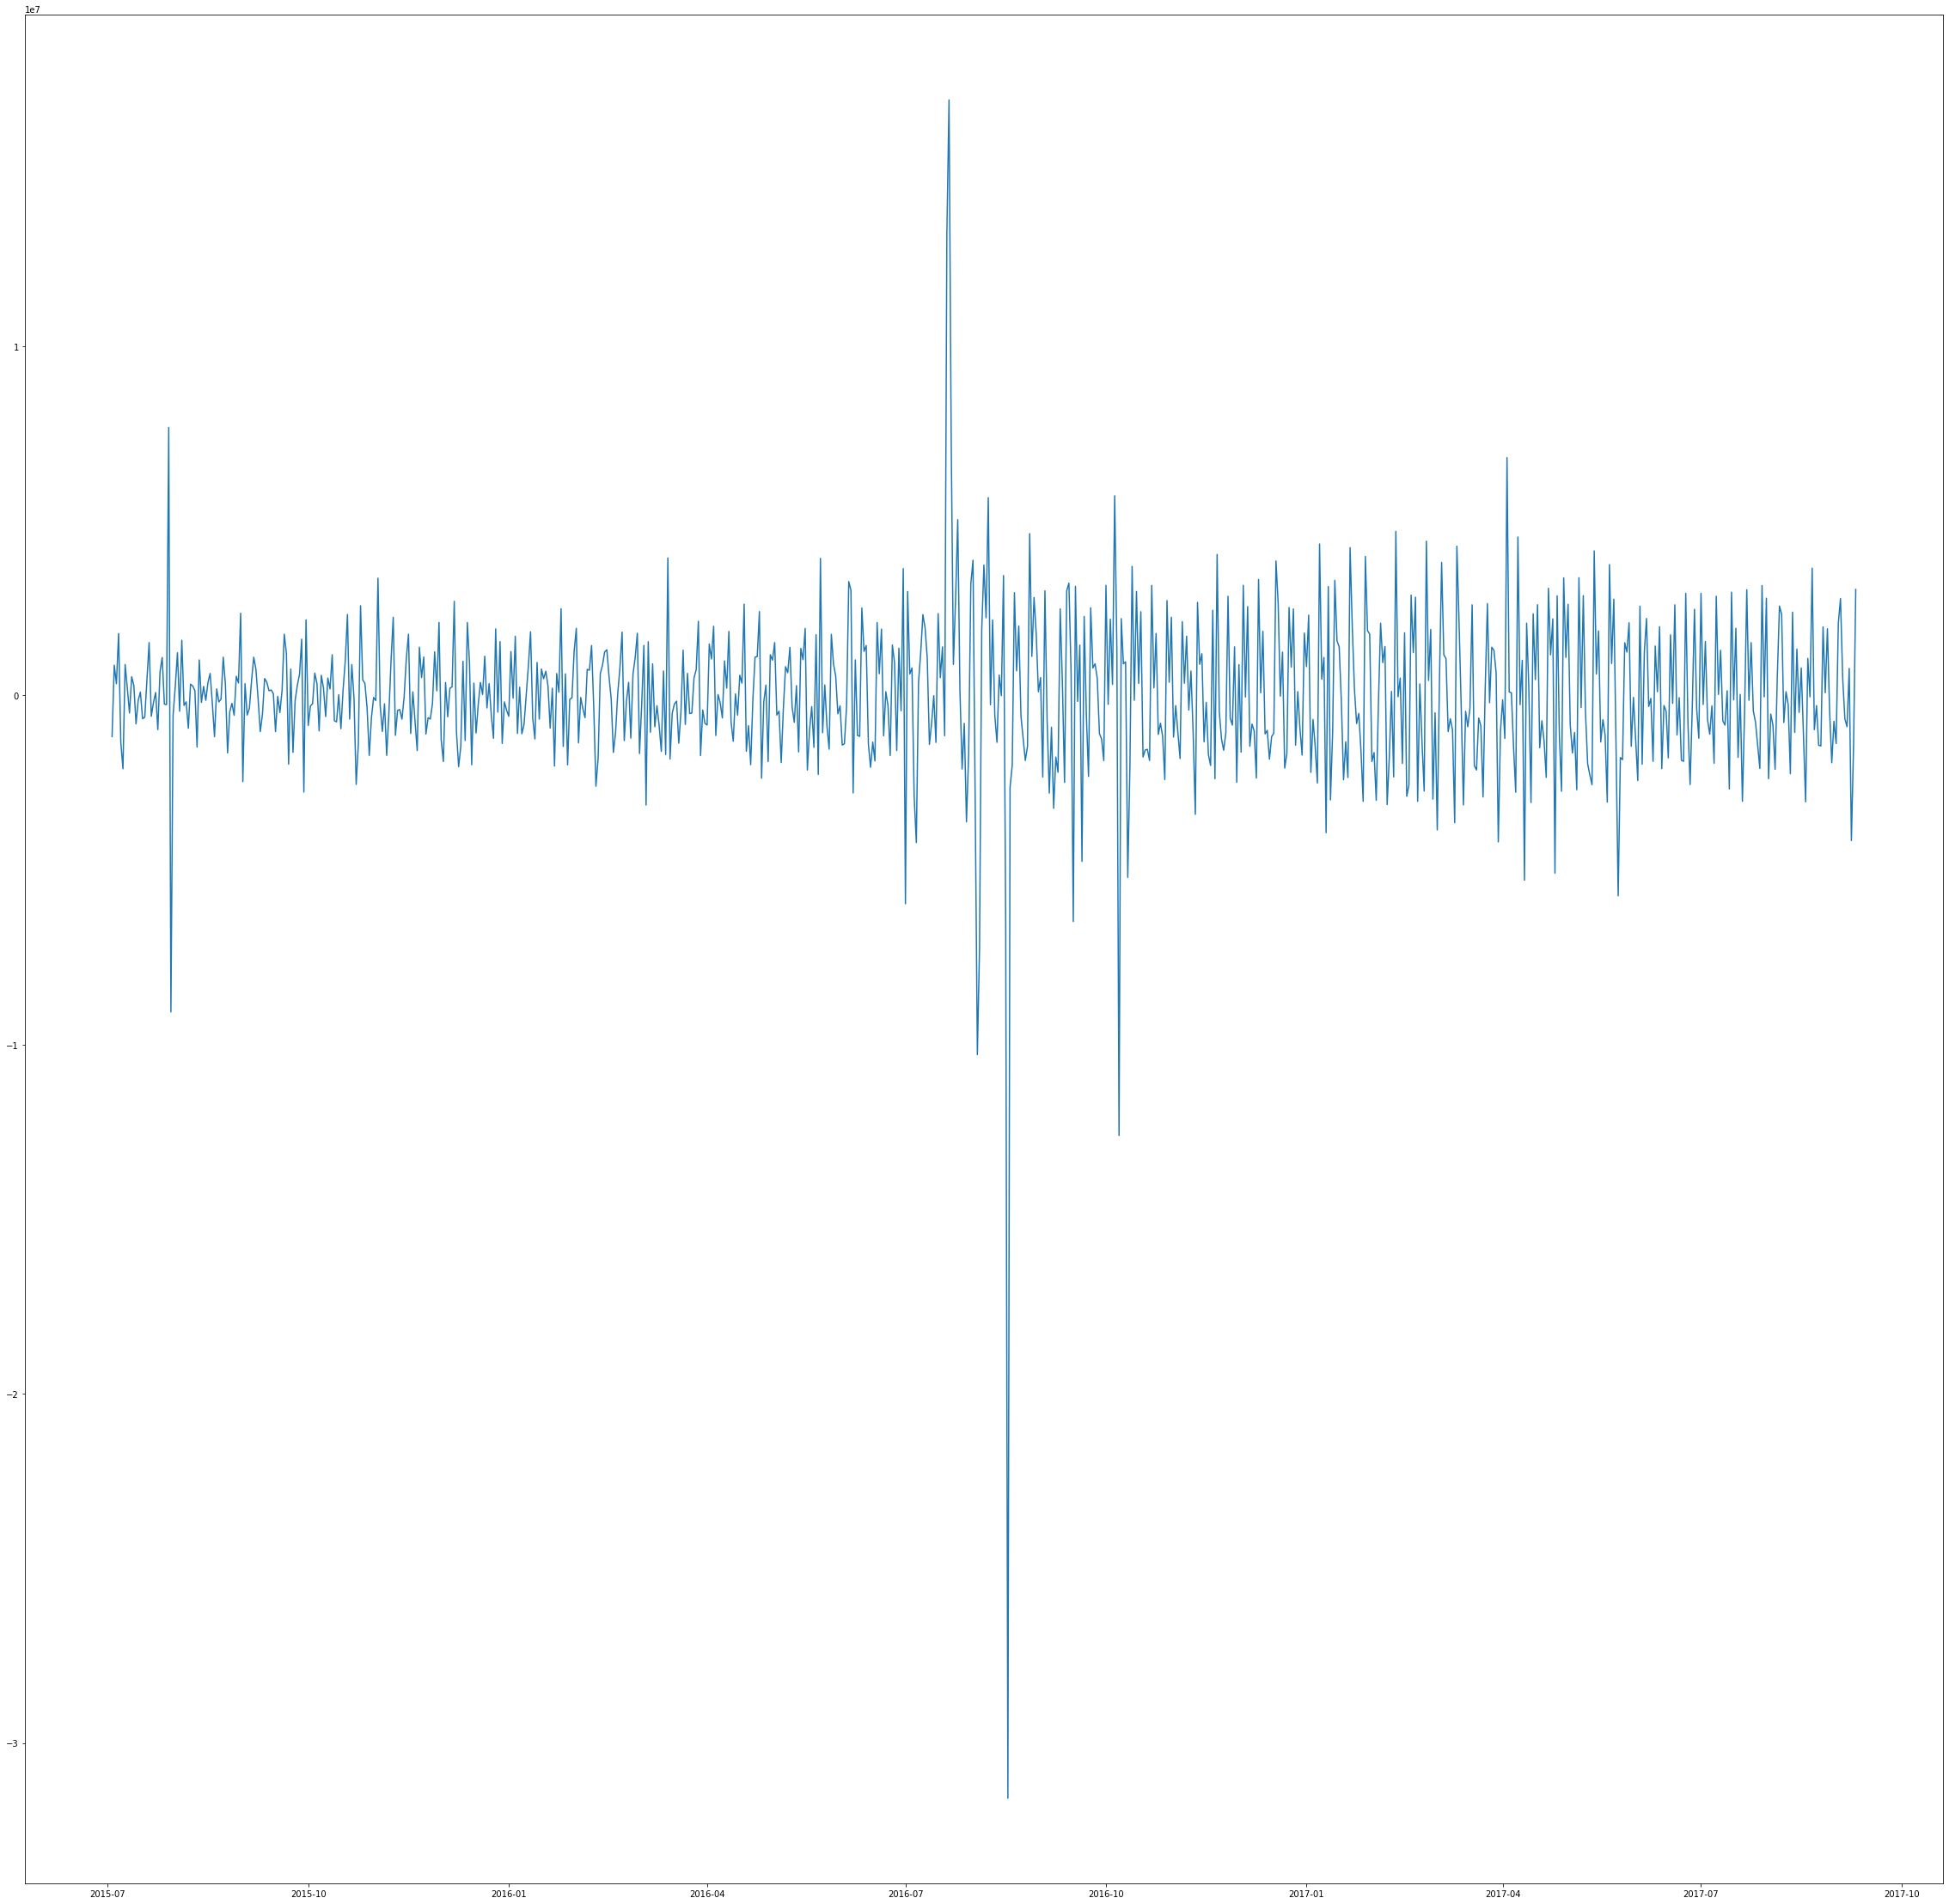

In [ ]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(40)
plt.plot(data_1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Main_Page_en.wikipedia.org_all-access_all-agents'],order=(2,0,21))
model_fit=model.fit()

In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             ARMA Model Results                                             
============================================================================================================
Dep. Variable:     Main_Page_en.wikipedia.org_all-access_all-agents   No. Observations:                  802
Model:                                                  ARMA(2, 21)   Log Likelihood              -12793.611
Method:                                                     css-mle   S.D. of innovations        2039957.953
Date:                                              Wed, 01 Dec 2021   AIC                          25637.223
Time:                                                      03:51:10   BIC                          25754.400
Sample:                                                  07-02-2015   HQIC                         25682.232
                                                       - 09-10-2017                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                    2.142e+07   1.42e+06     15.122      0.000    1.86e+07    2.42e+07
ar.L1.Main_Page_en.wikipedia.org_all-access_all-agents      1.3219      0.132      9.989      0.000       1.063       1.581
ar.L2.Main_Page_en.wikipedia.org_all-access_all-agents     -0.4644      0.120     -3.870      0.000      -0.700      -0.229
ma.L1.Main_Page_en.wikipedia.org_all-access_all-agents     -0.2960      0.133     -2.223      0.027      -0.557      -0.035
ma.L2.Main_Page_en.wikipedia.org_all-access_all-agents      0.0478      0.041      1.156      0.248      -0.033       0.129
ma.L3.Main_Page_en.wikipedia.org_all-access_all-agents      0.0237      0.036      0.655      0.513      -0.047       0.095
ma.L4.Main_Page_en.wikipedia.org_all-access_all-agents      0.1226      0.038      3.209      0.001       0.048       0.197
ma.L5.Main_Page_en.wikipedia.org_all-access_all-agents      0.1573      0.037      4.267      0.000       0.085       0.230
ma.L6.Main_Page_en.wikipedia.org_all-access_all-agents      0.1021      0.047      2.178      0.030       0.010       0.194
ma.L7.Main_Page_en.wikipedia.org_all-access_all-agents      0.2604      0.043      5.989      0.000       0.175       0.346
ma.L8.Main_Page_en.wikipedia.org_all-access_all-agents      0.0444      0.047      0.945      0.345      -0.048       0.137
ma.L9.Main_Page_en.wikipedia.org_all-access_all-agents      0.0568      0.038      1.493      0.136      -0.018       0.131
ma.L10.Main_Page_en.wikipedia.org_all-access_all-agents     0.0403      0.038      1.053      0.293      -0.035       0.115
ma.L11.Main_Page_en.wikipedia.org_all-access_all-agents     0.0347      0.041      0.851      0.395      -0.045       0.115
ma.L12.Main_Page_en.wikipedia.org_all-access_all-agents     0.1030      0.040      2.596      0.010       0.025       0.181
ma.L13.Main_Page_en.wikipedia.org_all-access_all-agents     0.1261      0.041      3.096      0.002       0.046       0.206
ma.L14.Main_Page_en.wikipedia.org_all-access_all-agents     0.3305      0.036      9.197      0.000       0.260       0.401
ma.L15.Main_Page_en.wikipedia.org_all-access_all-agents    -0.0747      0.049     -1.532      0.126      -0.170       0.021
ma.L16.Main_Page_en.wikipedia.org_all-access_all-agents     0.1040      0.044      2.364      0.018       0.018       0.190
ma.L17.Main_Page_en.wikipedia.org_all-access_all-agents     0.0480      0.043      1.106      0.269      -0.037       0.133
ma.L18.Main_Page_en.wikipedia.org_all-access_all-agents     0.0917      0.039      2.327      0.020       0.014       0

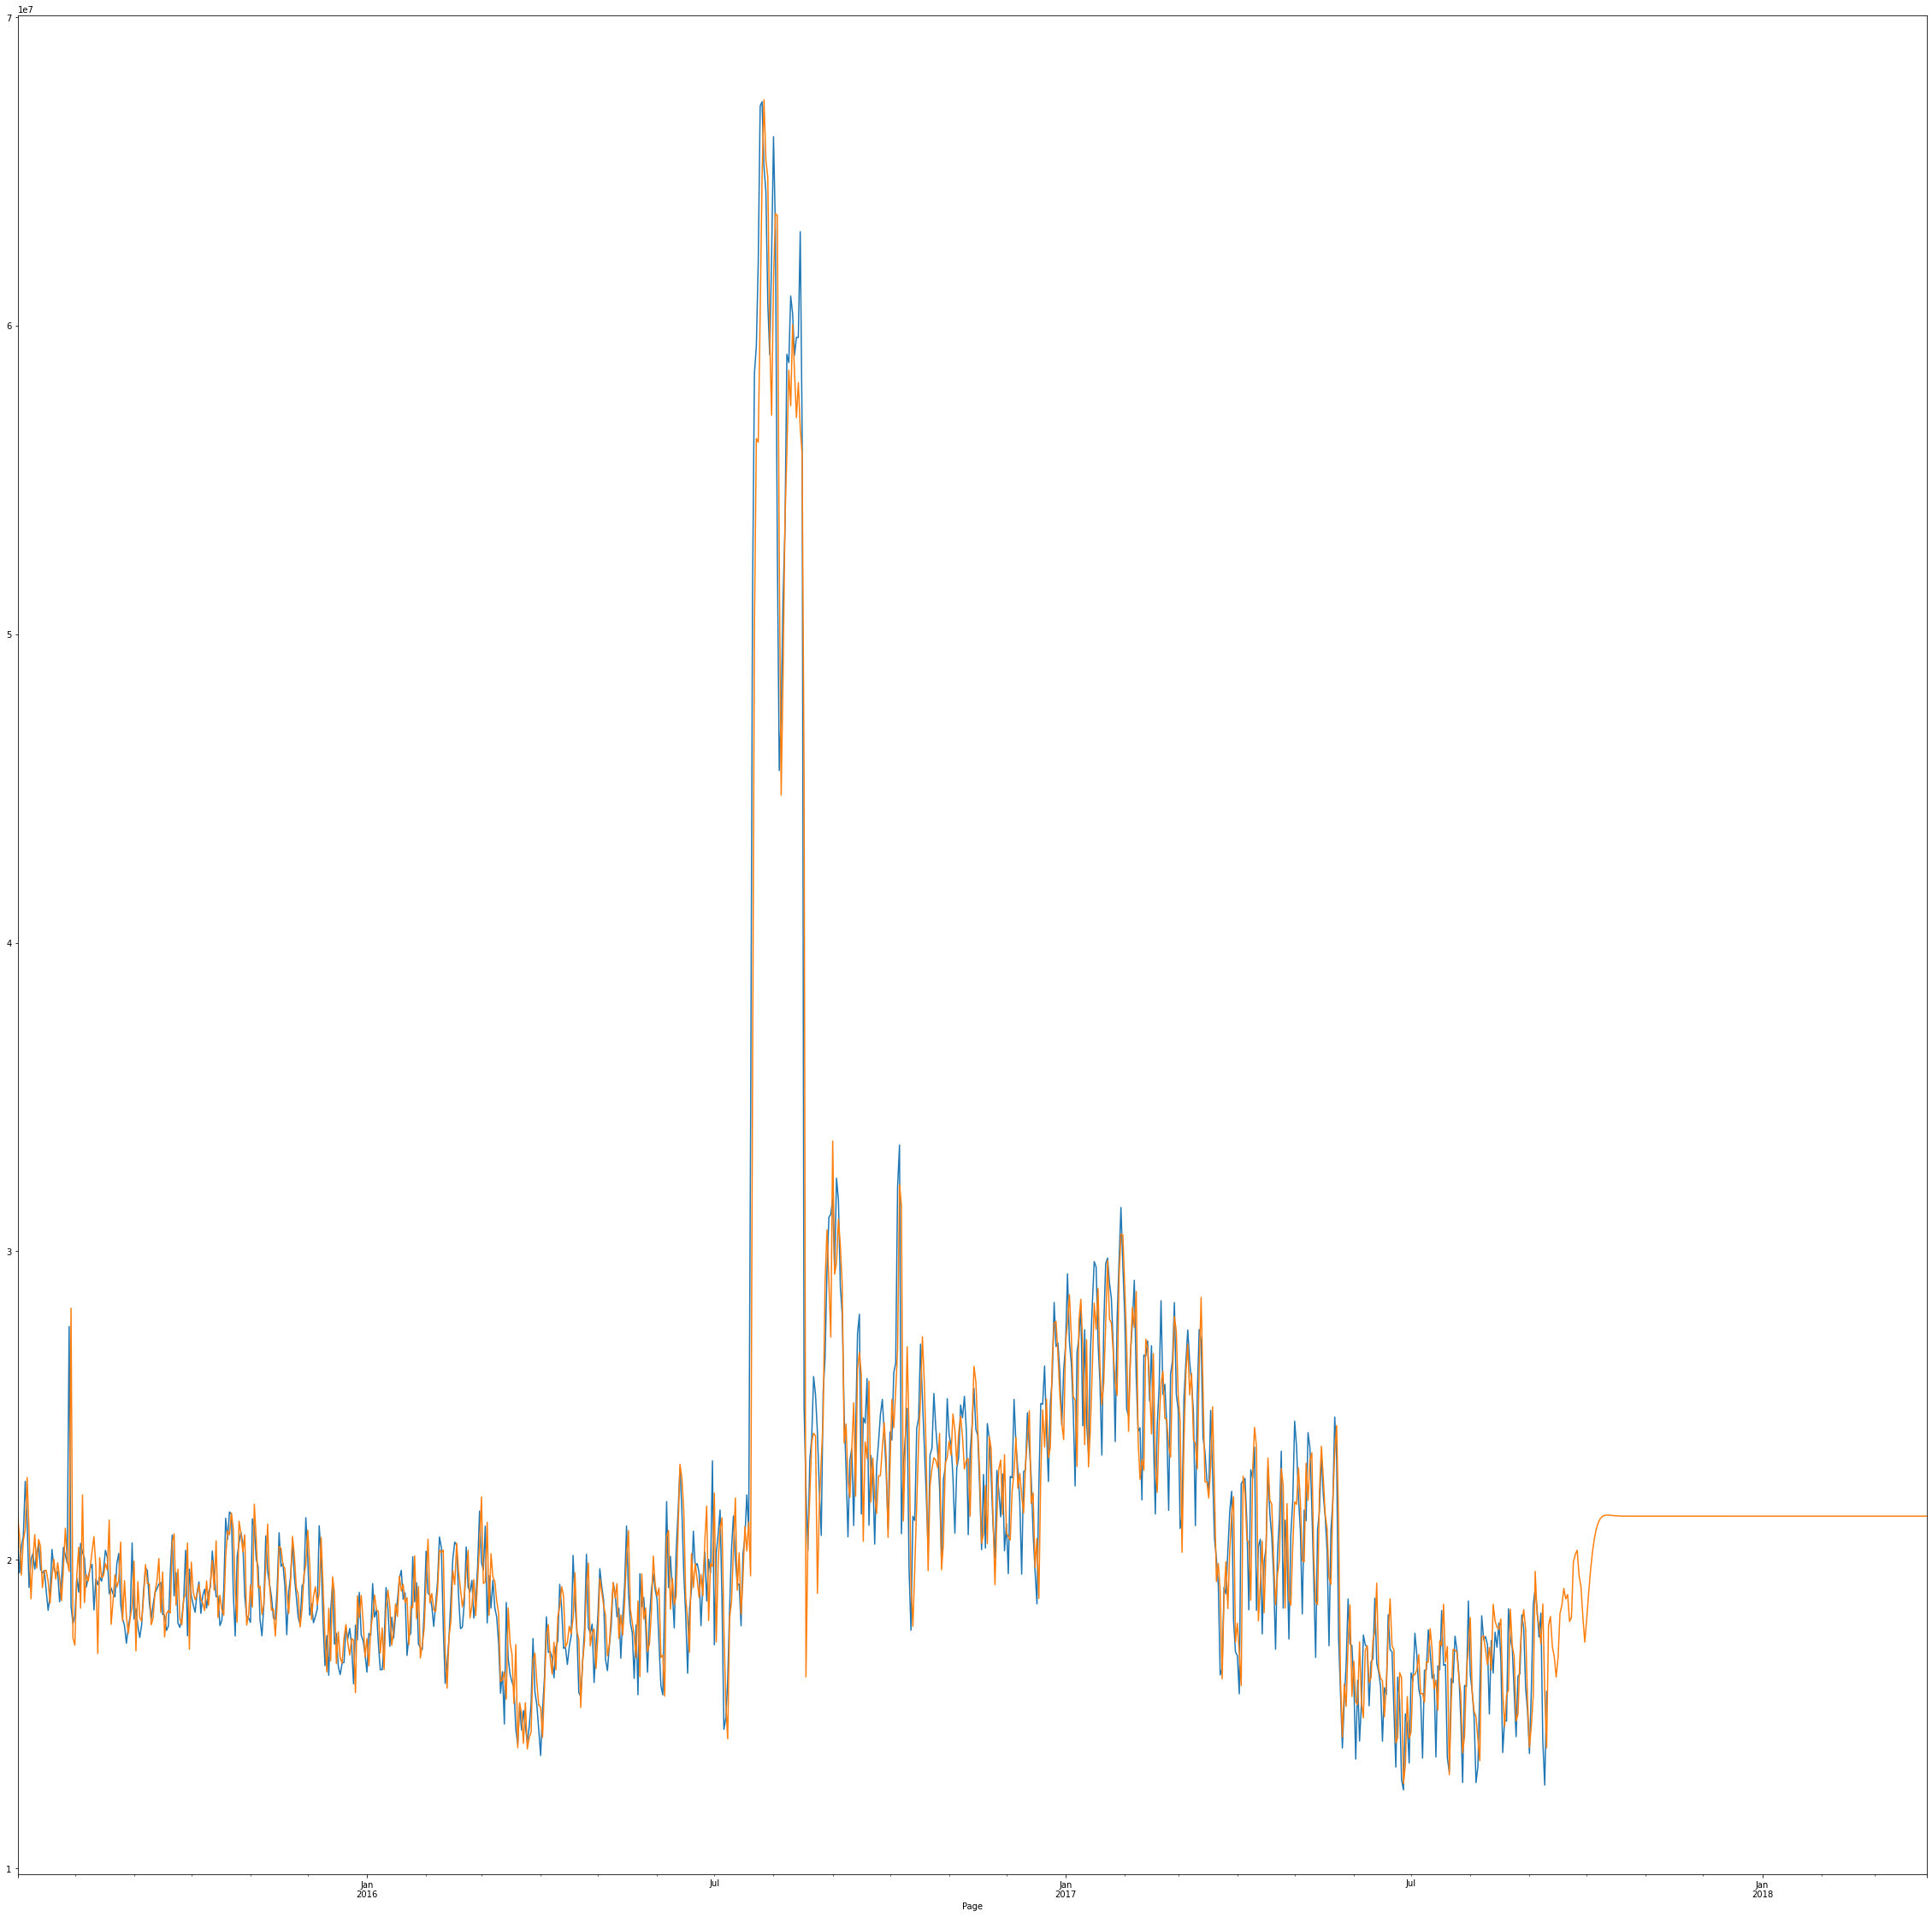

In [ ]:
forecast=model_fit.predict(start=0,end=1000)
data['Main_Page_en.wikipedia.org_all-access_all-agents'].plot(figsize=(40,40))
forecast.plot(figsize=(40,40))

In [ ]:
forecast

2015-07-22    1.937379e+07
2015-07-23    1.990388e+07
2015-07-24    1.941294e+07
2015-07-25    1.868099e+07
2015-07-26    1.970354e+07
                  ...     
2015-10-06    1.873235e+07
2015-10-07    1.860117e+07
2015-10-08    1.835774e+07
2015-10-09    1.931748e+07
2015-10-10    1.852533e+07
Freq: D, Length: 81, dtype: float64

In [ ]:
qq=model_fit.predict(start=750,end=801,dynamic=True)

In [ ]:
data

,Main_Page_en.wikipedia.org_all-access_all-agents,forecast
Page,,
2015-07-02,20752194.0,NaN
2015-07-03,19573967.0,NaN
2015-07-04,20439645.0,NaN
2015-07-05,20772109.0,NaN
2015-07-06,22544669.0,NaN
...,...,...
2017-09-06,17499187.0,1.786599e+07
2017-09-07,18273046.0,1.726905e+07
2017-09-08,14116665.0,1.857019e+07


In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Main_Page_en.wikipedia.org_all-access_all-agents'],order=(2, 0, 1),seasonal_order=(2,0,1,90))
results=model.fit()

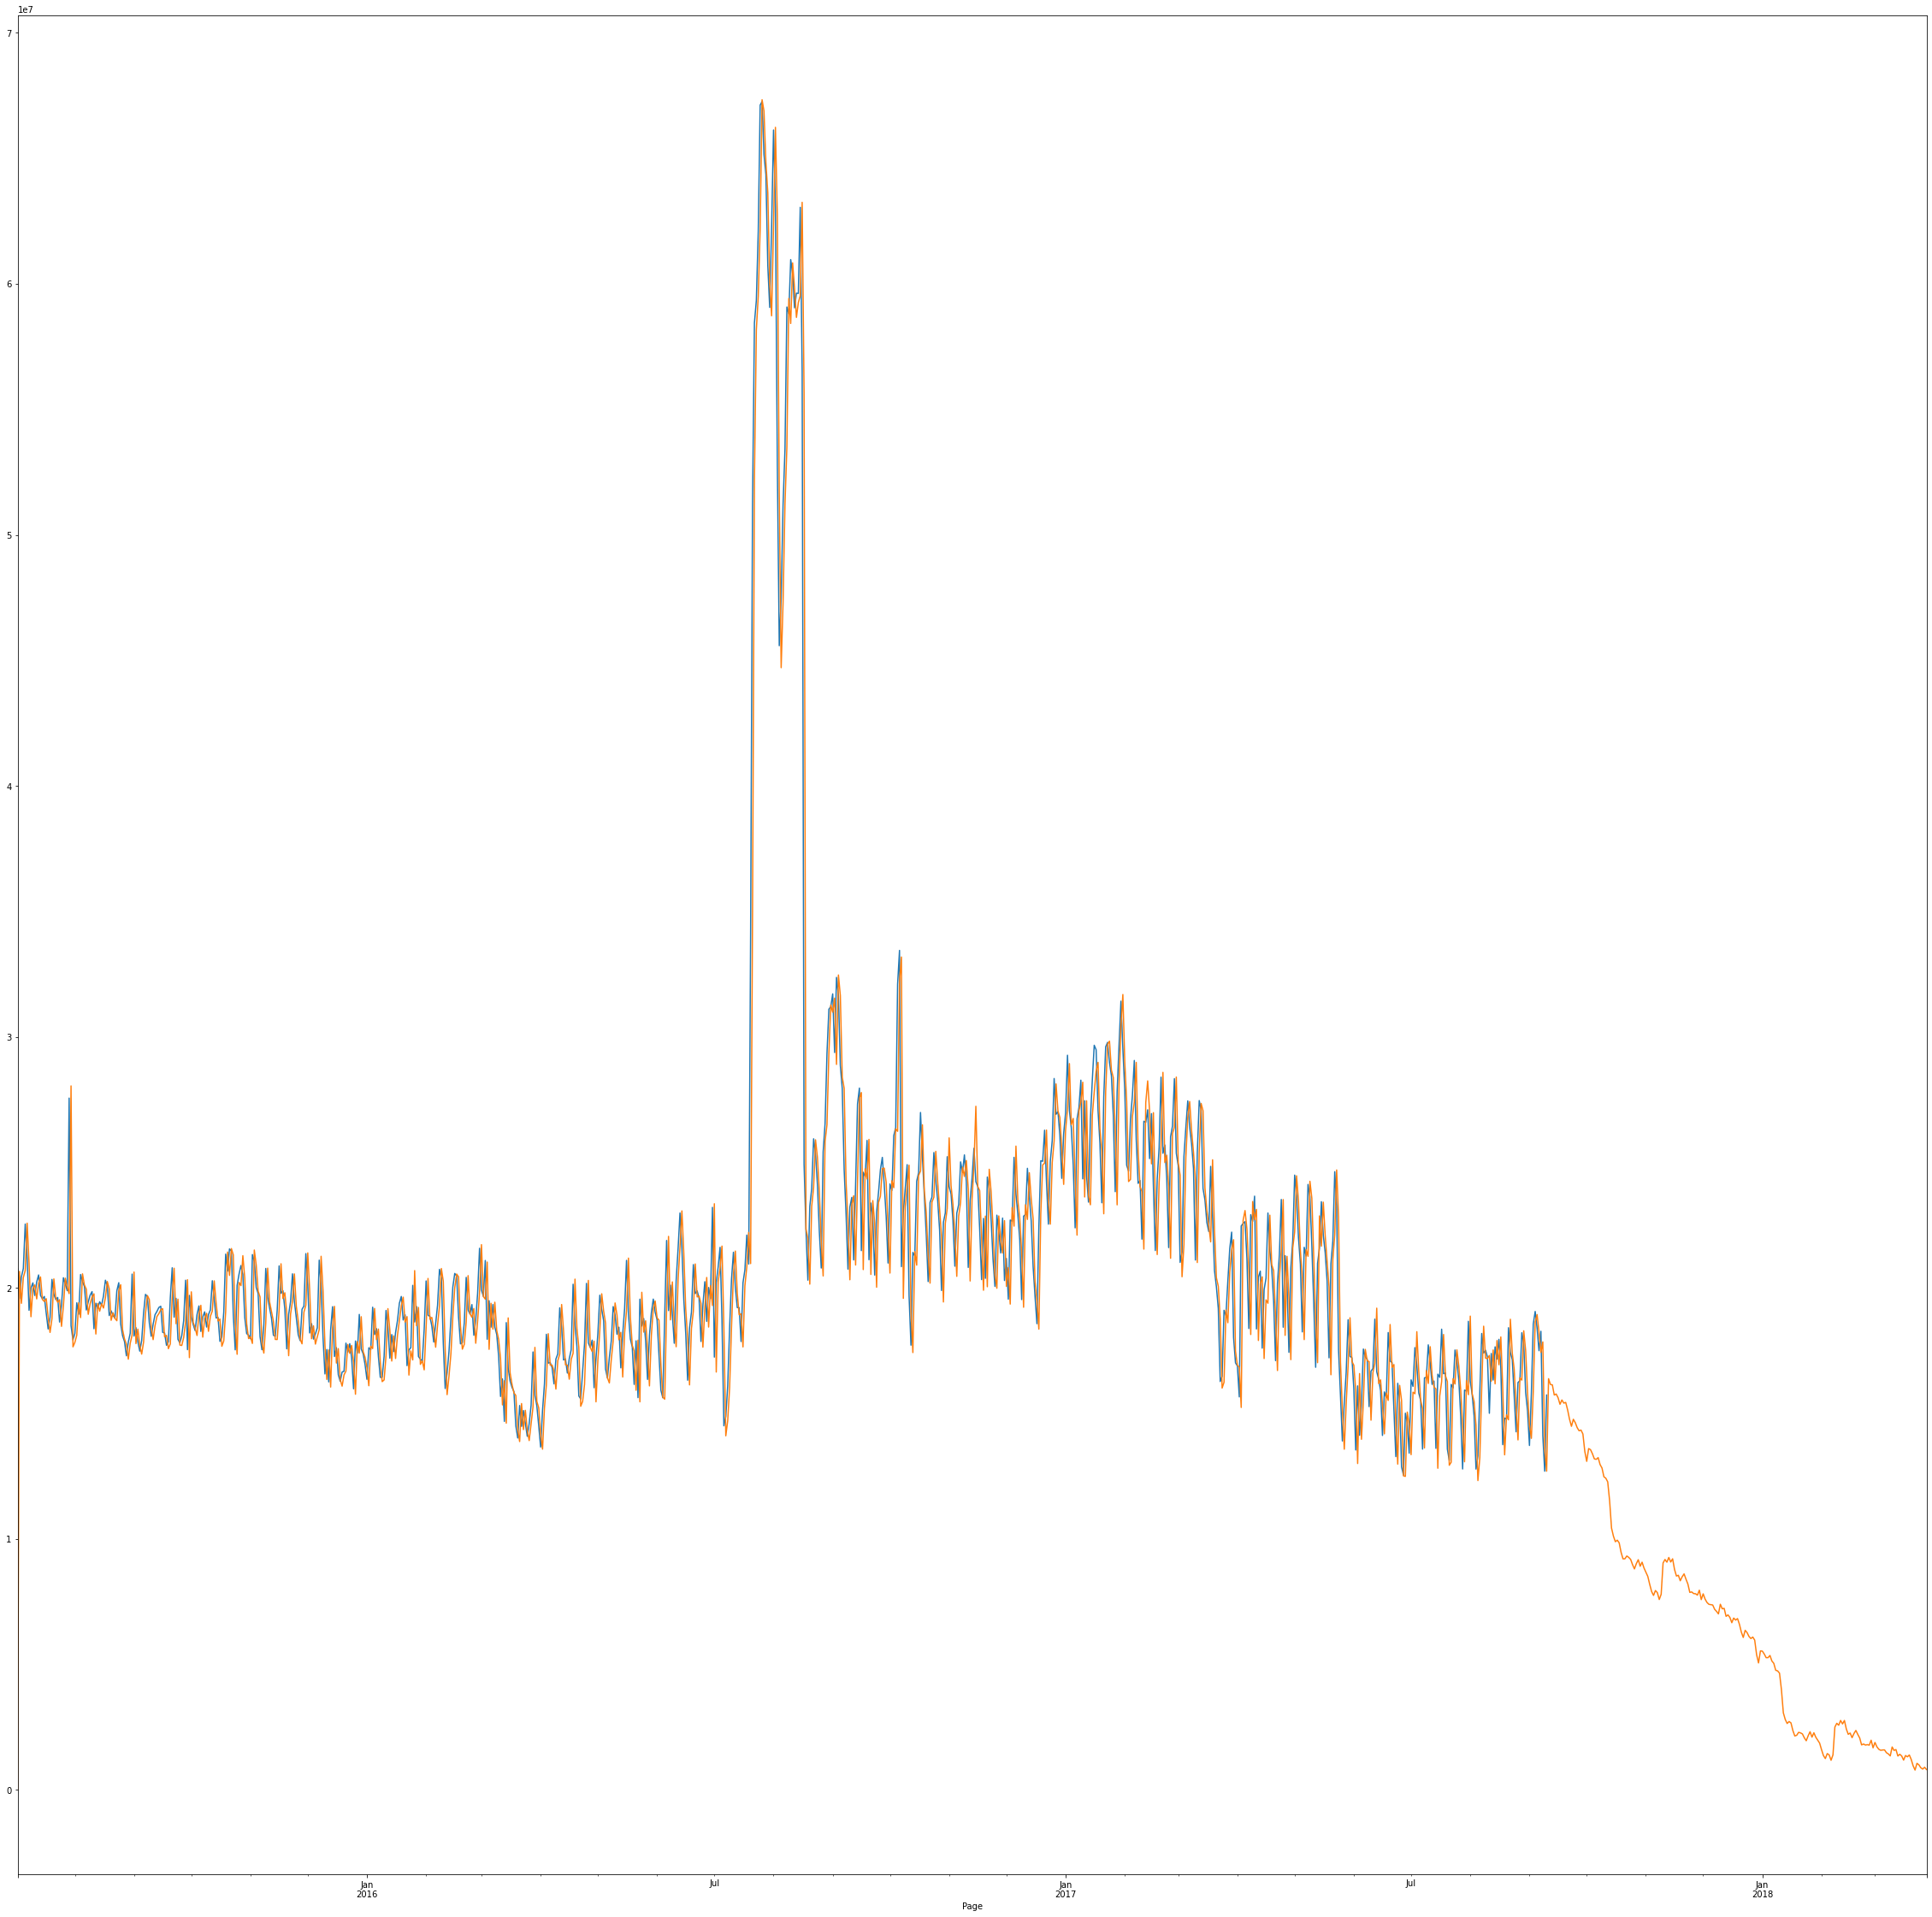

In [ ]:
forecast=results.predict(start=0,end=1000)
data['Main_Page_en.wikipedia.org_all-access_all-agents'].plot(figsize=(40,40))
forecast.plot(figsize=(40,40))